# Other ways to evaluate the dependencies between data

Besides using correlation matrix , other methods are using PCA and/or Mutual Information

In [1]:
#imports
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# importing dataset

dico = pd.read_json("dico_features.json")

dico_2 = dico.drop(['way', 'index', 'segment'], axis=1)

X = dico_2

# this  replaces the NaN data point with 0
X = pd.DataFrame(X).fillna(value = 0 )

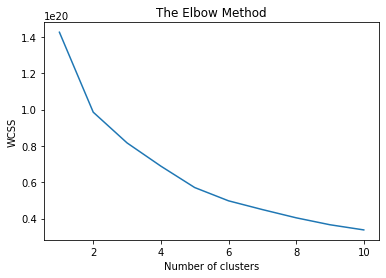

In [3]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)


In [5]:
# Since it is impossible to visualize the resultant clusters y_means, we need PCA

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)



# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)




In [6]:
y_kmeans = kmeans.fit_predict(X) 

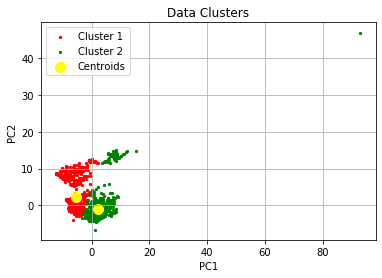

In [7]:

# Visualing the clusters 
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s =5, c= 'red', label = 'Cluster 1') 
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s =5, c= 'green', label = 'Cluster 2') 
#plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s =5, c= 'blue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s =5, c= 'cyan', label = 'Cluster 4') 
#plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s =100, c= 'pink', label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Data Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

In [8]:
# The Mutual Information is a measure of the similarity between two labels of the same data. 


# The close to 1 the mutual information is, the greater relationship the two data share. 

sklearn.metrics.mutual_info_score(X[0],X[1])


0.6931471805599453

In [9]:
'''
Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI) score to scale 
the results between 0 (no mutual information) and 1 (perfect correlation).
'''

sklearn.metrics.normalized_mutual_info_score(X[0],X[1], average_method ='geometric' )

1.0